In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

PARKNAME = {'snieves': "Sierra de las Nieves", 'donana': "Doñana"}
INTERESTED = ['emp', 'mus', 'rara', 'ory', 'fsi', 'lyn', 'lut', 'sus', 'mel', 'vul', 'lep', 'equ', 'cer', 'bos', 'gen', 'her', 'dam', 'fel', 'can', 'ovar', 'mafo', 'capi', 'caae', 'ovor', 'caca']
COLORS = {'all': "#8D32EB", 'snieves': "#888888", 'donana': "#C2A031"}

In [6]:
splits = {
    "train": pd.read_csv("train.csv"),
    "val": pd.read_csv("val.csv"),
    "test": pd.read_csv("test.csv"),
}

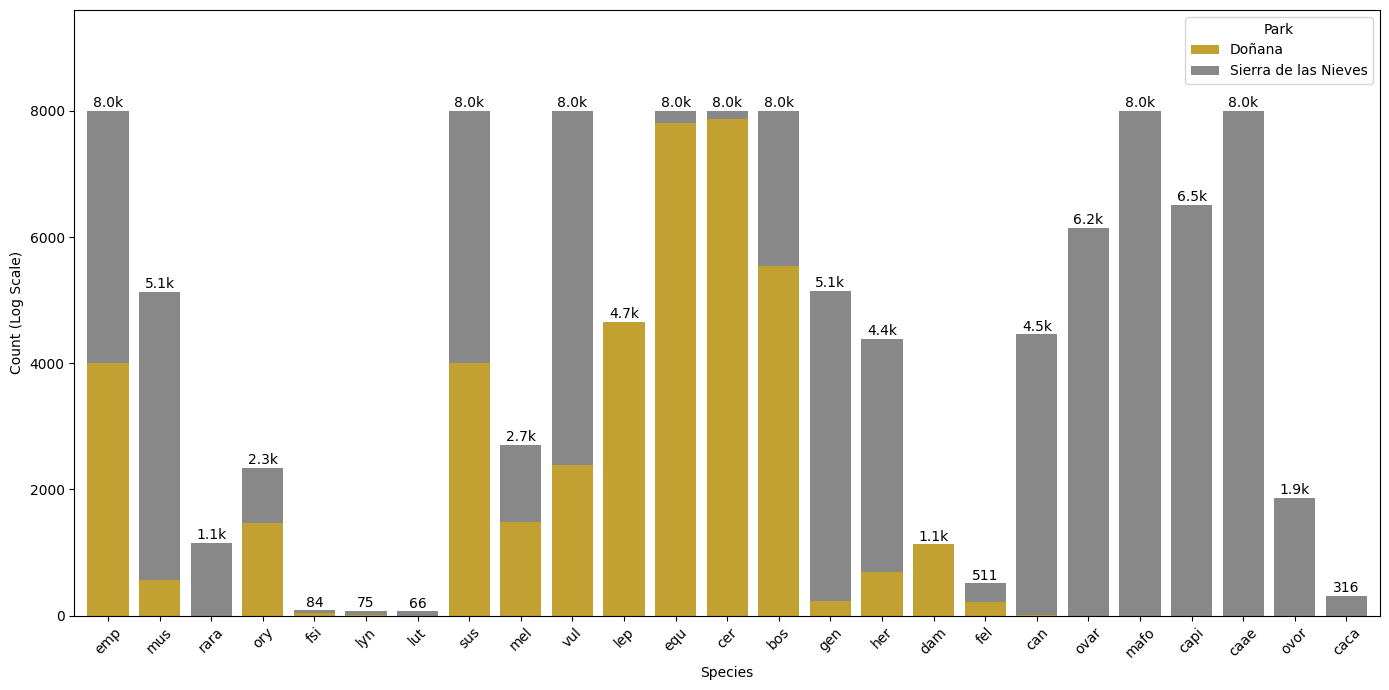

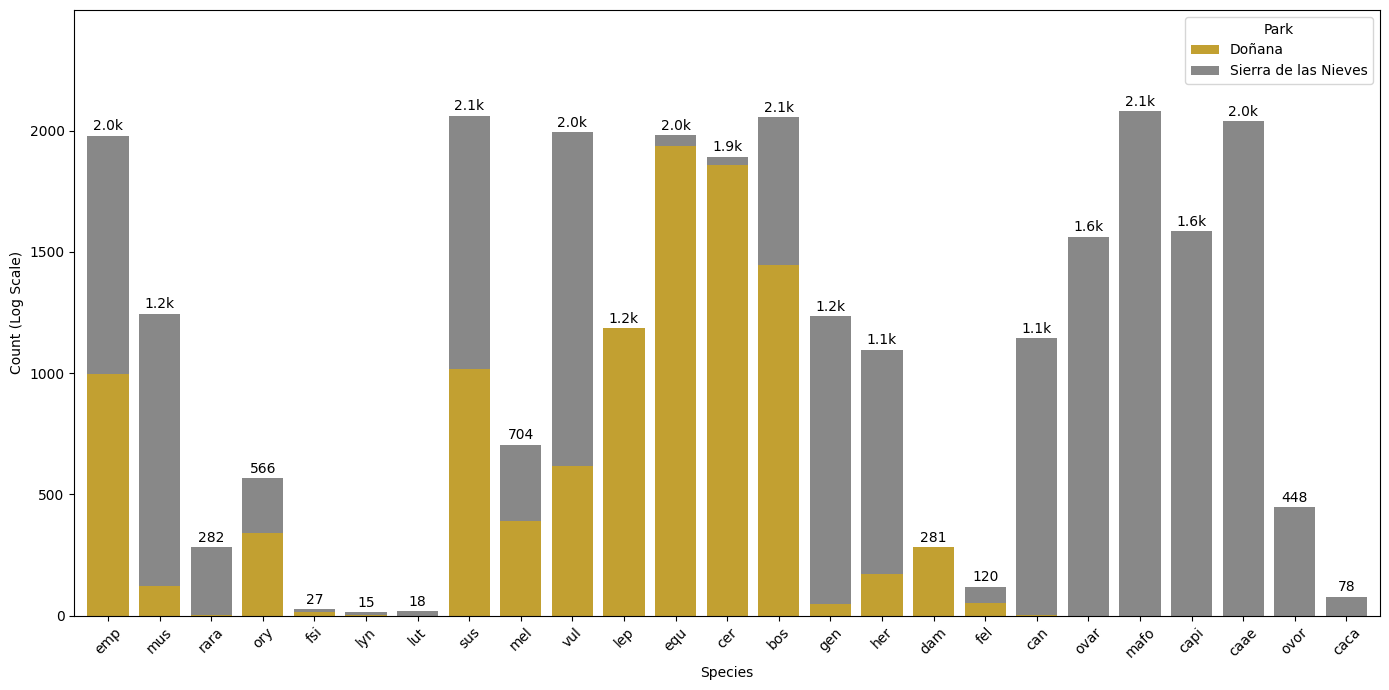

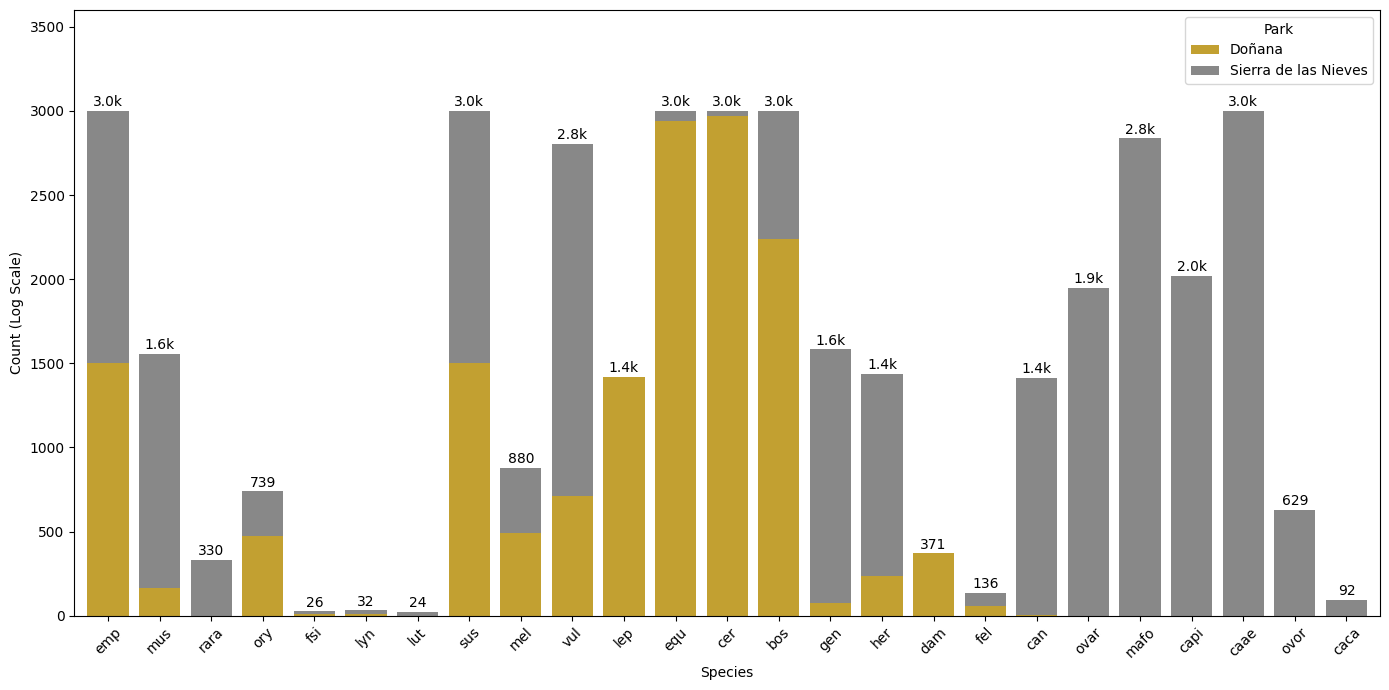

In [ ]:
# Function to plot species distribution
def plot_species_distribution_and_parks(dataframe, title):
    species_park_counts = dataframe.groupby(['species', 'park']).size().unstack(fill_value=0).reindex(INTERESTED, fill_value=0)

    plt.figure(figsize=(14, 7))

    park_colors = [COLORS[park] for park in species_park_counts.columns]
    species_park_counts.plot(
        kind='bar',
        stacked=True,
        color=park_colors,
        width=0.8,
        ax=plt.gca()
    )

    plt.ylim(0, species_park_counts.sum(axis=1).max() * 1.2)

    plt.xlabel('Species')
    plt.ylabel('Count (Log Scale)')
    plt.xticks(rotation=45)
    for i, count in enumerate(species_park_counts.sum(axis=1).values):
        if count < 1: continue
        plt.text(i, count + 10, f'{count / 1000:.1f}k' if count >= 1000 else str(count), 
                 ha='center', va='bottom', fontsize=10, rotation=0)

    plt.legend([PARKNAME.get(p, p) for p in species_park_counts.columns], title="Park")

    plt.tight_layout()
    plt.savefig(f"images/species_distribution_{title}.png")
    plt.show()
    
# Plot species distribution for each dataset split
for name, dataframe in splits.items():
    plot_species_distribution_and_parks(dataframe, name)